In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
for i in data.columns:
    if(data[i].isna().sum()>0):
        print(i +': ' + str(data[i].isna().sum()*100/data.shape[0]) +'%')

Unnamed: 32: 100.0%


In [5]:
#Encoding the cancer type
data['diagnosis']=data['diagnosis'].map({'B':0,'M':1})

In [6]:
#dropping the id & unnamed column
data.drop(columns=['Unnamed: 32','id'],inplace=True)

Feature selection: I am doing this to avoid features which are highly correlated

In [7]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
#I am going to seperate the data into average, se and worst and remove features which are highly 
#correlated
mean=data.iloc[:, 1:11]
se=data.iloc[:, 11:21]
worst=data.iloc[:, 21:31]

In [9]:
mean_corr=mean.corr()
fig=px.imshow(mean_corr, x=mean.columns,y=mean.columns)
fig.show()

In [10]:
def swarmplot(df):
    mean_norm=(df-df.mean())/df.std()
    mean_norm=pd.concat([data['diagnosis'],mean_norm],axis=1)
    mean_norm = pd.melt(mean_norm,id_vars="diagnosis",var_name="features", value_name='value')
    plt.figure(figsize=(10,10))
    sns.swarmplot(x="features", y="value", hue="diagnosis", data=mean_norm)
    plt.xticks(rotation=90)
    


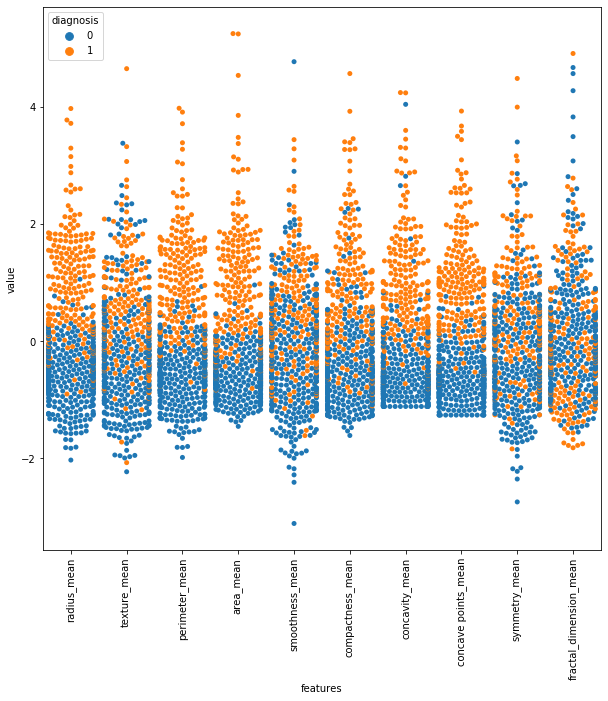

In [11]:
swarmplot(mean)

In the column with mean values: 
Perimeter_mean,area_mean and radius_mean are highly correlated, hence we can keep either one of them
I am going to keep perimeter_mean as it is easily seperable compared to the other 2

In [12]:
columns_to_be_dropped=['radius_mean','area_mean']

In [13]:
se_corr=se.corr()
fig=px.imshow(se_corr, x=se.columns,y=se.columns)
fig.show()

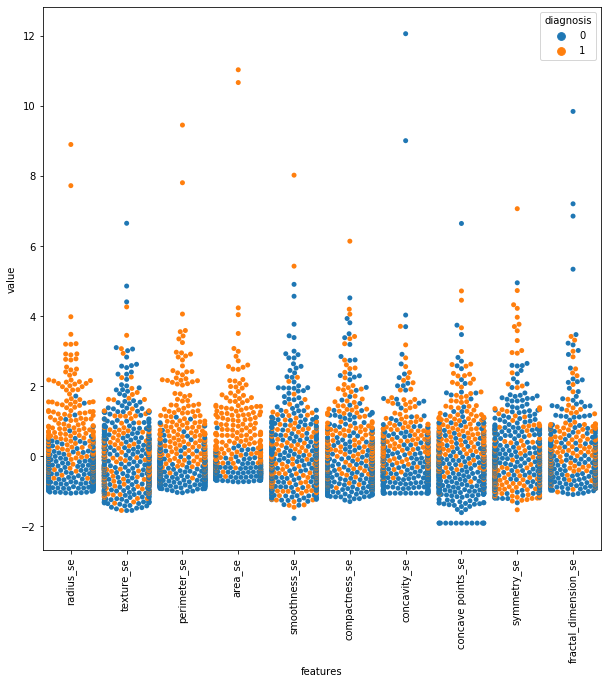

In [14]:
swarmplot(se)

This again has the same parameters as earlier however this time I will keep area_se

In [15]:
columns_to_be_dropped.append('radius_se')
columns_to_be_dropped.append('perimeter_se')

In [16]:
worst_corr=worst.corr()
fig=px.imshow(worst_corr, x=worst.columns,y=worst.columns)
fig.show()

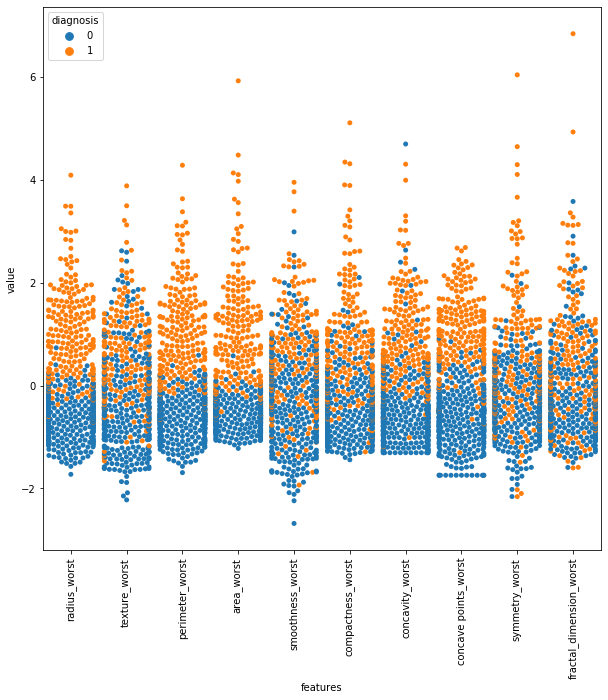

In [17]:
swarmplot(worst)

Here I am going to keep perimeter_worst

In [18]:
columns_to_be_dropped.append('radius_worst')
columns_to_be_dropped.append('area_worst')

In [19]:
print('Shape of dataset before dropping: {}'.format(data.shape))

Shape of dataset before dropping: (569, 31)


In [20]:
data.drop(columns=columns_to_be_dropped,inplace=True)

In [21]:
print('Shape of dataset after dropping: {}'.format(data.shape))

Shape of dataset after dropping: (569, 25)


In [22]:
data_corr=data.corr()
fig=px.imshow(data_corr, x=data.columns,y=data.columns)
fig.show()

Overall these are the fields which are highly ocrrelated:
1. Texture mean and Texture worst - will keep texture mean
2. Perimeter mean and Perimeter worst - will keep perimeter worst

In [23]:
data.drop(columns=['texture_worst','perimeter_mean'],inplace=True)

In [24]:
y=data.iloc[:, 0].values
X=data.iloc[:, 1:].values

In [25]:
#Creating Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Modelling

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0,max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_pred=lr_classifier.predict(X_test)
accuracy_lr=accuracy_score(lr_pred,y_test)
accuracy_lr

0.958041958041958

In [28]:
#Random Forest
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pred=classifier.predict(X_test)

In [30]:
accuracy_rf=accuracy_score(y_pred,y_test)
accuracy_rf

0.9440559440559441

In [34]:
#K- Nearest Neighors
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
knn_pred = classifier.predict(X_test)

In [35]:
accuracy_knn=accuracy_score(knn_pred,y_test)
accuracy_knn

0.9300699300699301

In [37]:
# Support Vector Classifier
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)
accuracy_svc=accuracy_score(svc_pred,y_test)
print(accuracy_svc)

0.951048951048951


I am going to tune the hyperparameters for SVC and Logistic Regression

In [38]:
from sklearn.model_selection import GridSearchCV
param_lr= {'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20)}
grid_lr= GridSearchCV(estimator = lr_classifier,
                           param_grid = param_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [39]:
grid_lr = grid_lr.fit(X_train, y_train)

In [40]:
classifier = LogisticRegression(random_state = 0,max_iter=1000,C=545.5594781168514, penalty='l2')
classifier.fit(X_train, y_train)
lr_pred=classifier.predict(X_test)
accuracy_lr=accuracy_score(lr_pred,y_test)
accuracy_lr

0.951048951048951

In [41]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid_search = GridSearchCV(estimator = svc_classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [42]:
grid_search = grid_search.fit(X_train, y_train)

In [43]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [44]:
classifier = SVC(kernel = 'rbf', random_state = 0,C= 1000, gamma= 0.0001)
classifier.fit(X_train, y_train)
svc_pred = classifier.predict(X_test)
accuracy_svc=accuracy_score(svc_pred,y_test)
print(accuracy_svc)

0.958041958041958
